In this notebook we concatenate the data from AGRI4CAST'S "Gridded Daily Agro-Meteorological Data in Europe in NetCDF Lat-Lon format" and SoilGrids to make a comprehensive forecast and soil dataset based on latitude-longitude coordinates. 

The downloading of the data is conducted in these steps:

AGRI4CAST: (This is not provided because its gbs large)
1. Head to this link: https://agri4cast.jrc.ec.europa.eu/dataportal/resource/18
2. For each point of variable of data, download them on yearly intervals. (this is unfortunately very manual work)
3. Concatenate each variable into its own encompasing .nc file. This means an individual yearly encompasing data file for each individual variable. In a Linux env you can use the ncrcat command.
4. Place the concatenated and yearly files in the corresponding "forecast_data/agri4cast_{variable name}" folder

SoilGrids: (This should have been provided)
This download requires a Linux environment due to the usage of the SoilGrids python library. It is unknown if it works on macOS, but it has been found to not work on Windows.
1. Set up a Linux environment if needed
2. Download the data by running the soilgrid_download.py file and downloading its requirements
3. If any files were misplaced, place them inside the soil_data folder

================================================================

The following cell sets up a few things:
1. The soil type mapping for the id's in the downloaded soilgrid data
2. The coverages of the types of downloaded data in soilgrids data
3. Loading the AGRI4CAST data
4. Gathering the valid latitude-longitude coordinates in the AGRI4CAST data

In [36]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

soil_type_map = {
    'Acrisols': 0,
    'Albeluvisols': 1,
    'Alisols': 2,
    'Andosols': 3,
    'Arenosols': 4,
    'Calcisols': 5,
    'Cambisols': 6,
    'Chernozems': 7,
    'Cryosols': 8,
    'Durisols': 9,
    'Ferralsols': 10,
    'Fluvisols': 11,
    'Gleysols': 12,
    'Gypsisols': 13,
    'Histosols': 14,
    'Kastanozems': 15,
    'Leptosols': 16,
    'Lixisols': 17,
    'Luvisols': 18,
    'Nitisols': 19,
    'Phaeozems': 20,
    'Planosols': 21,
    'Plinthosols': 22,
    'Podzols': 23,
    'Regosols': 24,
    'Solonchaks': 25,
    'Solonetz': 26,
    'Stagnosols': 27,
    'Umbrisols': 28,
    'Vertisols': 29
}

coverages = [
                'phh2o_0-5cm_mean', 'phh2o_5-15cm_mean', 'phh2o_15-30cm_mean', 'phh2o_30-60cm_mean', 'phh2o_60-100cm_mean', 'phh2o_100-200cm_mean', 
                'nitrogen_0-5cm_mean','nitrogen_5-15cm_mean', 'nitrogen_15-30cm_mean', 'nitrogen_30-60cm_mean', 'nitrogen_60-100cm_mean', 'nitrogen_100-200cm_mean',
                'sand_0-5cm_mean', 'sand_5-15cm_mean', 'sand_15-30cm_mean', 'sand_30-60cm_mean', 'sand_60-100cm_mean', 'sand_100-200cm_mean', 
                'clay_0-5cm_mean', 'clay_5-15cm_mean', 'clay_15-30cm_mean', 'clay_30-60cm_mean', 'clay_60-100cm_mean', 'clay_100-200cm_mean', 
                'silt_0-5cm_mean', 'silt_5-15cm_mean', 'silt_15-30cm_mean', 'silt_30-60cm_mean', 'silt_60-100cm_mean', 'silt_100-200cm_mean', 
                'cfvo_0-5cm_mean', 'cfvo_5-15cm_mean', 'cfvo_15-30cm_mean', 'cfvo_30-60cm_mean', 'cfvo_60-100cm_mean', 'cfvo_100-200cm_mean', 
                'soc_0-5cm_mean', 'soc_5-15cm_mean', 'soc_15-30cm_mean', 'soc_30-60cm_mean', 'soc_60-100cm_mean', 'soc_100-200cm_mean', 
                'ocs_0-30cm_mean', 
                'ocd_0-5cm_mean', 'ocd_5-15cm_mean', 'ocd_15-30cm_mean', 'ocd_30-60cm_mean', 'ocd_60-100cm_mean', 'ocd_100-200cm_mean',
                'bdod_0-5cm_mean', 'bdod_5-15cm_mean', 'bdod_15-30cm_mean', 'bdod_30-60cm_mean', 'bdod_60-100cm_mean', 'bdod_100-200cm_mean',
                'cec_0-5cm_mean', 'cec_5-15cm_mean', 'cec_15-30cm_mean', 'cec_30-60cm_mean', 'cec_60-100cm_mean', 'cec_100-200cm_mean',
                'MostProbable' # soil type classification
            ]

greater_threshold = [20, 25, 30]
less_threshold = [-20, -25, -30]

fn_p = 'forecast_data/agri4cast_precip/all_agri4cast_precip.nc'
fn_mx_t = 'forecast_data/agri4cast_max_temp/all_agri4cast_max_temp.nc'
fn_mn_t = 'forecast_data/agri4cast_min_temp/all_agri4cast_min_temp.nc'
fn_av_t = 'forecast_data/agri4cast_mean_temp/all_agri4cast_mean_temp.nc'

ds_p = nc.Dataset(fn_p)
ds_mx_t = nc.Dataset(fn_mx_t)
ds_mn_t = nc.Dataset(fn_mn_t)
ds_av_t = nc.Dataset(fn_av_t)

x = 0

lat = []
lon = []
for y in range(len(ds_mn_t['AirTemperatureMin'][x])):
    for v in range(len(ds_mn_t['AirTemperatureMin'][x][y])):
        val = ds_mn_t['AirTemperatureMin'][x][y][v]
        v2 = ds_mx_t['AirTemperatureMax'][x][y][v]
        v3 = ds_p['Rain'][x][y][v]
        v4 = ds_av_t['AirTemperatureMean'][x][y][v]
        if val is not np.ma.masked and v2 is not np.ma.masked and v3 is not np.ma.masked and v4 is not np.ma.masked:
            lat.append(ds_mn_t['lat'][y])
            lon.append(ds_mn_t['lon'][v])

# matrix lon, lat matrix of non masked values
jrc_XY = np.array([lon, lat]).T
jrc_XY.size

36322

This cell uses the individual yearly AGRI4CAST data to calculate the index ranges for each individual year.
Also printing out some variable information for verification.

In [37]:
head = 'forecast_data/agri4cast_precip/'
x= [
f'{head}6_agri4cast_precip.nc',
f'{head}7_agri4cast_precip.nc',
f'{head}8_agri4cast_precip.nc',
f'{head}9_agri4cast_precip.nc',
f'{head}10_agri4cast_precip.nc',
f'{head}11_agri4cast_precip.nc',
f'{head}12_agri4cast_precip.nc',
f'{head}13_agri4cast_precip.nc',
f'{head}14_agri4cast_precip.nc',
f'{head}15_agri4cast_precip.nc',
f'{head}16_agri4cast_precip.nc',
f'{head}17_agri4cast_precip.nc',
f'{head}18_agri4cast_precip.nc',
f'{head}19_agri4cast_precip.nc',
f'{head}20_agri4cast_precip.nc',
f'{head}21_agri4cast_precip.nc',
f'{head}22_agri4cast_precip.nc',
f'{head}23_agri4cast_precip.nc',
f'{head}24_agri4cast_precip.nc'
]
yearly_ranges = []
total = 0
for f in x:
    temp = total
    test = nc.Dataset(f)
    print(test.dimensions['time'])
    total += test.dimensions['time'].size
    yearly_ranges.append((temp, total))
print(total)
print(yearly_ranges)

for dim in ds_p.dimensions.values():
    print(dim)

for var in ds_p.variables.values():
    print(var)


"<class 'netCDF4.Dimension'>" (unlimited): name = 'time', size = 365
"<class 'netCDF4.Dimension'>" (unlimited): name = 'time', size = 365
"<class 'netCDF4.Dimension'>" (unlimited): name = 'time', size = 366
"<class 'netCDF4.Dimension'>" (unlimited): name = 'time', size = 365
"<class 'netCDF4.Dimension'>" (unlimited): name = 'time', size = 365
"<class 'netCDF4.Dimension'>" (unlimited): name = 'time', size = 365
"<class 'netCDF4.Dimension'>" (unlimited): name = 'time', size = 366
"<class 'netCDF4.Dimension'>" (unlimited): name = 'time', size = 365
"<class 'netCDF4.Dimension'>" (unlimited): name = 'time', size = 365
"<class 'netCDF4.Dimension'>" (unlimited): name = 'time', size = 365
"<class 'netCDF4.Dimension'>" (unlimited): name = 'time', size = 366
"<class 'netCDF4.Dimension'>" (unlimited): name = 'time', size = 365
"<class 'netCDF4.Dimension'>" (unlimited): name = 'time', size = 365
"<class 'netCDF4.Dimension'>" (unlimited): name = 'time', size = 315
"<class 'netCDF4.Dimension'>" (unl

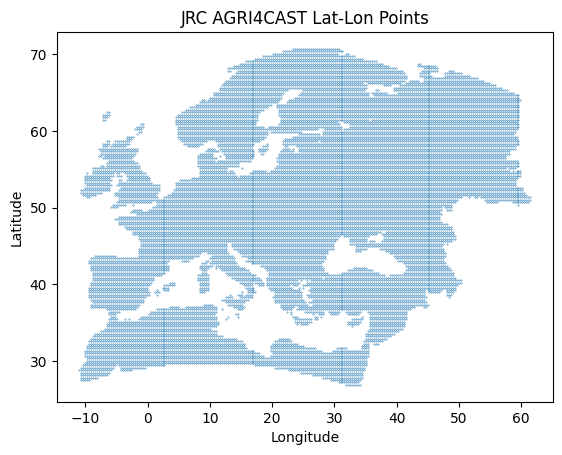

In [38]:
# kind of see a map of europe, just print a scatter plot of the lat-lon coords for verification
plt.scatter(lon, lat, s=0.1)
plt.title('JRC AGRI4CAST Lat-Lon Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The next two cells contain previously used functions from previous attempts to download soil data. 
Previously we would need to make manual calculations from km to lat/lon degrees, but newer approaches remove the requirement.
Additionally, we would use a system to request the SoilGrids API manually, but for each individual point. This was very costly and dropped once we learned about the SoilGrids python library that handled a large amount of the problems.

In [39]:
import math

r_earth = 6371
pi_180 = math.pi / 180

# test calculation with latitude
lat_rads = math.radians(46.659943)

denom = pi_180 * r_earth * math.cos(lat_rads)

def delta_lon(d_km, latitude):
    return d_km / (pi_180 * r_earth * math.cos(math.radians(latitude)))

In [40]:
from itertools import product

def calc_grid_pts(latitude, longitude):
    # the jrc  is 25km x 25km resolution
    # soilgrid is 250m x 250m resolution
    # == meaning 25/0.25 = 100 => 100 x 100 (or 10000 soil grid pts to average per jrc pt... YIKES)

    # calc corner coord of grid
    start_lat = latitude - delta_lat(12.5)
    end_lat = latitude + delta_lat(12.5)
    start_lon = longitude - delta_lon(12.5, start_lat)

    # calc all lon deltas, lon delta relies on lat values
    lat_delta = delta_lat(0.25) # 250m delta, will stay constant
    lats = np.array([(start_lat + (x * lat_delta)) for x in range(100)])

    # delta for going 250m, it depends on the lats
    lon_deltas = np.array([delta_lon(0.25, x) for x in lats])

    lons = np.empty((len(lats), len(lon_deltas)))
    for lon_delta, i in zip(lon_deltas, range(len(lons))):
        lons[i] = np.array([(start_lon + (x * lon_delta)) for x in range(100)])

    coords = np.empty(shape=(0, 2))
    for lat, lon in zip(lats, lons):
        coords = np.concatenate((coords, np.array(list(product([lat], lon)))))
    return coords

def bulk_calc_grid_pts(grid):
    coords = []
    for lat, lon in grid:
        coords.append(calc_grid_pts(lat, lon))
    return np.array(coords)

def get_request_property_vals(data):
    layers = []
    for layer in data['properties']['layers']:
        l_values = []
        for depth in layer['depths']:
            v = depth['values']['mean']
            if v:
                l_values.append(depth['values']['mean'])
            else:
                break
        if v:
            layers.append(np.array(l_values))
            
    return np.array(layers)

def avg_250_grid(coords, request):
    # (lat, lon) starting pos
    # request, w/o the lat & lon
    grid_vals = []
    for lat, lon in coords:
        r = requests.get(request+f'&lon={lon}&lat={lat}')
        data = r.json()
        print(data)
        grid_vals.append(get_request_property_vals(data))

    return np.array(grid_vals)

Below are cells testing the soilgrids library, at this point you will tell if you need to set up a Linux environment if you haven't needed to so far.

variable_name: Soil pH in H2O
variable_units: pH*10
service_url: https://maps.isric.org/mapserv?map=/map/phh2o.map
service_id: phh2o
coverage_id: phh2o_0-5cm_mean
crs: urn:ogc:def:crs:EPSG::4326
bounding_box: (3.215424, 50.134808, 8.126557, 53.81976)
grid_res: [0.004911132999999999, 0.003684952000000002]


Text(0, 0.5, 'Latitude')

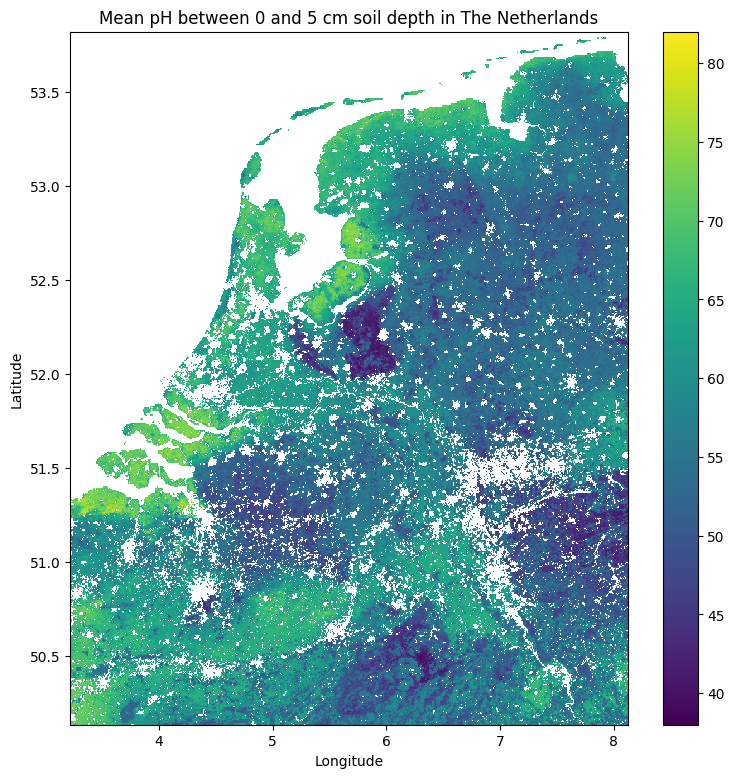

In [41]:
# 52.134808, 4.215424
# 53.819760, 8.126557

import matplotlib.pyplot as plt
from soilgrids import SoilGrids

# get data from SoilGrids
soil_grids = SoilGrids()
data = soil_grids.get_coverage_data(service_id='phh2o', coverage_id='phh2o_0-5cm_mean', 
                                       west=3.215424, south=50.134808, east=8.126557, north=53.819760,  
                                       crs='urn:ogc:def:crs:EPSG::4326',output='test.tif', height=1000, width=1000)

# show metadata
for key, value in soil_grids.metadata.items():
    print('{}: {}'.format(key,value))


# plot data, removing the filled data
fill_mask = data != -32768
plt_data = data.where(fill_mask)
plt_data.plot(figsize=(9,9), label='Soil pH')
plt.title('Mean pH between 0 and 5 cm soil depth in The Netherlands')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [42]:
data # we see that the fill value is -32768 we want to replace those with None so we can skip them on the average otherwise it will skew our mean

<xarray.DataArray (band: 1, y: 1000, x: 1000)> Size: 2MB
array([[[-32768, -32768, ..., -32768, -32768],
        [-32768, -32768, ..., -32768, -32768],
        ...,
        [    72,     73, ...,     59,     54],
        [    72,     72, ...,     55,     56]]],
      shape=(1, 1000, 1000), dtype=int16)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 8kB 3.218 3.223 3.228 3.233 ... 8.114 8.119 8.124
  * y            (y) float64 8kB 53.82 53.81 53.81 53.81 ... 50.14 50.14 50.14
    spatial_ref  int64 8B 0
Attributes:
    TIFFTAG_XRESOLUTION:     72
    TIFFTAG_YRESOLUTION:     72
    TIFFTAG_RESOLUTIONUNIT:  2 (pixels/inch)
    AREA_OR_POINT:           Area
    _FillValue:              -32768
    scale_factor:            1.0
    add_offset:              0.0

In [43]:
data.min()

<xarray.DataArray ()> Size: 2B
array(-32768, dtype=int16)
Coordinates:
    spatial_ref  int64 8B 0

In [10]:
from scipy import stats
fill_mask = data != -32768
data_arr = data.values
data_real = data_arr[fill_mask]
stats.mode(data_real)
# skipping the fill values we can calculate the mean value!

ModeResult(mode=np.int16(54), count=np.int64(44678))

[ 4.940522 52.271991]
4.840522
5.040521999999999 <class 'numpy.float64'>
52.171991
52.371991
variable_name: Soil pH in H2O
variable_units: pH*10
service_url: https://maps.isric.org/mapserv?map=/map/phh2o.map
service_id: phh2o
coverage_id: phh2o_0-5cm_mean
crs: urn:ogc:def:crs:EPSG::4326
bounding_box: (4.840522, 52.171991, 5.040521999999999, 52.371991)
grid_res: [0.001999999999999986, 0.002000000000000076]


/tmp/ipykernel_50007/2918620531.py:42: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


Text(0, 0.5, 'Latitude')

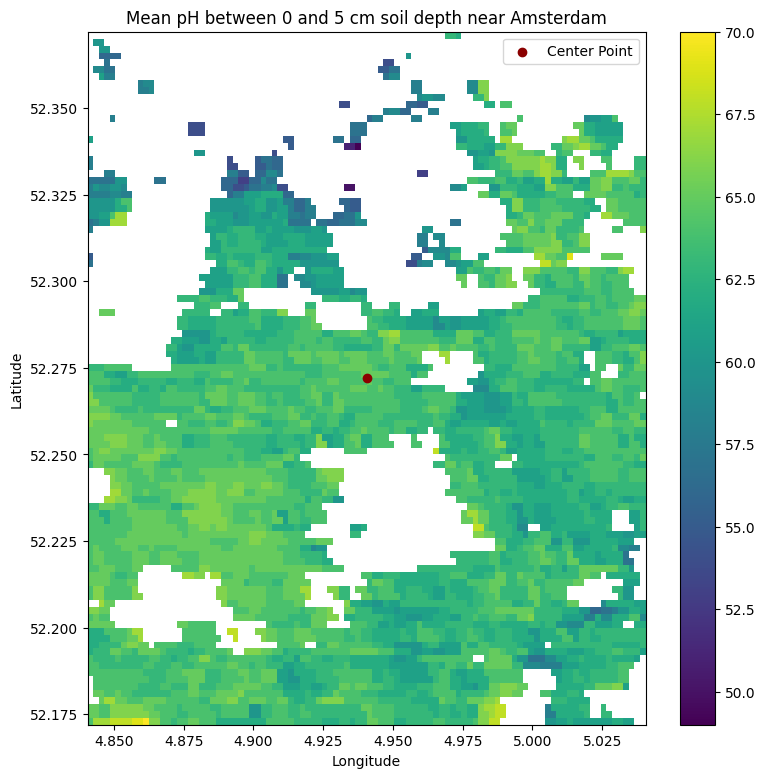

In [33]:
# lets find the point closest to amsterdamn
from scipy.spatial.distance import cdist
amsterdamn_coord = (4.9041, 52.3676)

d_matrix = cdist([amsterdamn_coord], jrc_XY)
center_pt = jrc_XY[d_matrix.argmin()] # lon, lat
print(center_pt)
west = center_pt[0]-0.1
south = center_pt[1]-0.1
east = center_pt[0]+0.1
north = center_pt[1]+0.1

print(west)
print(f'{east} {type(east)}')
print(south)
print(north)

# lets get the data around this point (we'll make it a bigger region to demonstrate)
import matplotlib.pyplot as plt
from soilgrids import SoilGrids

# get data from SoilGrids
soil_grids = SoilGrids()
a_data = soil_grids.get_coverage_data(service_id='phh2o', coverage_id='phh2o_0-5cm_mean', 
                                       west=float(west), south=float(south), east=float(east), north=float(north),  
                                       crs='urn:ogc:def:crs:EPSG::4326',output='test.tif', 
                                       height=100, width=100
                                       )

# show metadata
for key, value in soil_grids.metadata.items():
    print('{}: {}'.format(key,value))


# plot data, removing the filled data
a_data.min()
fill_mask = a_data != -32768
plt_data = a_data.where(fill_mask)
plt_data.plot(figsize=(9,9), label='Soil pH')
plt.title('Mean pH between 0 and 5 cm soil depth near Amsterdam')
plt.scatter(center_pt[0], center_pt[1], c='darkred', label='Center Point')
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [31]:
from scipy import stats
fill_mask = a_data != -32768
data_arr = a_data.values
data_real = data_arr[fill_mask]
t = stats.mode(data_real)
# skipping the fill values we can calculate the mean value!
t

ModeResult(mode=np.int16(64), count=np.int64(1667))

Now that we've tested SoilGrids and found that we can load our data in very easily, we can now download the SoilGrids data. Hopefully we find a way to provide this data as well, so you don't need to wait 2 days of downloading to get all of properties.

================================================================

Assuming that you have everything downloaded and ran the above cells to set up a few variables, we can now output our concatenated dataset in these next few cells.

The steps are as followed:
1. Calculate the array masking for AGRI4CAST s.t. we only consider days where each varaible is available.
2. Create the pandas DataFrame for csv export:
    a. Calculate each feature for the yearly data
    b. Insert that data into our export dictionary


In [11]:

import numpy.ma as ma
rain_marr = ds_p['Rain'][:].sum(axis=0)
max_marr = ds_mx_t['AirTemperatureMax'][:].mean(axis=0)
min_marr = ds_mn_t['AirTemperatureMin'][:].mean(axis=0)
mean_marr = ds_av_t['AirTemperatureMean'][:].mean(axis=0)

# probably a better way to do it, but me has no time
point_mask = ~max_marr.mask & ~rain_marr.mask & ~min_marr.mask & ~mean_marr.mask


In [ ]:
import pandas as pd

export_dict = {'lon': jrc_XY.T[0], 'lat': jrc_XY.T[1]}

year = 6
for r1, r2 in yearly_ranges:
    year_rain_sum = ds_p['Rain'][r1:r2].sum(axis=0)
    year_rain_sum = year_rain_sum[point_mask]
    export_dict[f'yearly_rain_{year}'] = year_rain_sum

    year+=1

year = 6
for r1, r2 in yearly_ranges:
    year_min_temp = ds_mn_t['AirTemperatureMin'][r1:r2].min(axis=0)
    year_min_temp = year_min_temp[point_mask]
    export_dict[f'yearly_min_temp_{year}'] = year_min_temp
    year+=1
    
year = 6
for r1, r2 in yearly_ranges:
    year_avg_min_temp = ds_mn_t['AirTemperatureMin'][r1:r2].mean(axis=0)
    year_avg_min_temp = year_avg_min_temp[point_mask]
    export_dict[f'yearly_avg_min_temp_{year}'] = year_avg_min_temp
    year+=1

year = 6
for r1, r2 in yearly_ranges:
    year_max_temp = ds_mx_t['AirTemperatureMax'][r1:r2].max(axis=0)
    year_max_temp = year_max_temp[point_mask]
    export_dict[f'yearly_max_temp_{year}'] = year_max_temp
    year+=1

year = 6
for r1, r2 in yearly_ranges:
    year_avg_max_temp = ds_mx_t['AirTemperatureMax'][r1:r2].mean(axis=0)
    year_avg_max_temp = year_avg_max_temp[point_mask]
    export_dict[f'yearly_avg_max_temp_{year}'] = year_avg_max_temp
    year+=1

year = 6
for r1, r2 in yearly_ranges:
    year_avg_mean_temp = ds_av_t['AirTemperatureMean'][r1:r2].mean(axis=0)
    year_avg_mean_temp = year_avg_mean_temp[point_mask]
    export_dict[f'yearly_avg_mean_temp_{year}'] = year_avg_mean_temp
    year+=1  
        
# add soil_data
for coverage in coverages:
    soil_data = np.load(file=f'soil_data/jrc_{coverage}.npy')
    export_dict[coverage] = soil_data

df = pd.DataFrame(data=export_dict)
df.to_csv(path_or_buf='yearly_jrc_agri4cast_and_soil_data.csv')
